<a href="https://colab.research.google.com/github/paulsubarna/Convolutional-LSTM-using-Pytorch/blob/main/transfer_learning_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Tutorial 2: TRANSFER LEARNING

In this tutorial, we investigate "How transferable are features in deep neural networks ?". Previous studies has shown that features learned by neural networks at specific layers either *"appear"* to be specific to a particular dataset or *"general"* that are applicable to wide variety of datasets. As a result, we will try to quantify the transferability of the features from the bottom, middle, or top of the network in terms of generality & specificity. I recommmend to read this paper on [Transfer learning](https://arxiv.org/pdf/1411.1792). If you are confused about any training details in this notebook, please quickly go through this paper. The final plot should look like this plot as shown below. Note that, for all the finetuning experiment, you have to record N validation accuracies for N layers.

<p align="middle">

  <img  src="transfer.png" width=500  hspace="20" />
  <figcaption><h4 align="center">Transfer Learning  </h4></figcaption>

The general structure of this notebook will be as follows:
- Define a CNN model architecture (without residual layers)
- Train on Dataset A
- Train on Dataset B
- Finetune on Dataset B with the model pretrained on Dataset A (Freezing and Not freezing the layers)
- Finetune on Dataset B with the model pretrained on Dataset B (Freezing and Not freezing the layers)



In [ ]:

from datasets import load_dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from typing import Sequence

import torchvision.models.alexnet as alexnet



#### Load the dataset

In this notebook, we will use the Imagenette dataset, a subset of ImageNet1k dataset. In total we have 10 unique classes which we will divide it into 2 sets of datasets (5 classes each).

-- TO-Do --

1. Download the IMAGENETTE from torch. (frgfm/imagenette) (Use load dataset function from torch library).
2. Segment the dataset into A and B based on classes. For example, A --> (0,1,2,3,4) ; B --> (5,6,7,8,9)
3. Define the train dataloaders and validation dataloaders for A and B



In [ ]:
"""
---TO-DO---
1. Load the dataset
2. Apply the transforms
3. Create the dataloaders
"""
# fix torch seed
#to.manual_seed(42)

data_train = load_dataset('frgfm/imagenette', '320px', split='train')
data_test = load_dataset('frgfm/imagenette', '320px', split='validation')

mean = torch.tensor([0.4589, 0.4384, 0.4011])
std = torch.tensor([0.2793, 0.2724, 0.2835])

# Apply transforms
transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean, std),
])

def apply_transforms(x):
    x['image'] = [transforms(image.convert('RGB')) for image in x['image']]
    return x


### Split the dataset into two parts A: [0,1,2,3,4] and B: [5,6,7,8,9]

""" -- TO-DO -- """


# Create dataloaders
train_loader_A =
train_loader_B =
test_loader_A =
test_loader_B =

#### Define Model Architecture

-- TO-DO ---

1. Define a CNN neural architecture.
    - It should only have convoluation and feed-forward layers.
    - It should only have 8 layers
    - It should not have any residual layers
    - The final output layers will only have 5 output nodes as each dataset A & B have 5 class instances.
    - HINT: One such example CNN network is AlexNet.  

In [ ]:
if torch.cuda.is_available():
    print("CUDA is available")
    device = torch.device("cuda")
else:
    print("CUDA is not available")
    device = torch.device("cpu")

""" --TO-DO--
1. Implement the CNN model

"""



#### Implementing helper functions

1. Define a function to intialize the weights of the model
2. Define a function to freeze and unfreeze layers of the model
3. Define a function to randomly initialize or freeze a specific layers of the model.

In [ ]:
from torch.nn import Conv2d, Linear
model =
"""
-- TO-DO --
1. Implement the helper functions
   - Random initialization of the layers
   - Freeze/unfreeze layers
   - Count the number of layers
   """
#model.classifier.append(nn.Softmax(dim=1))

# Initialize the weights
for m in model.modules():


def set_grad(model, requires_grad: bool):
    ## Set the requires_grad attribute for all parameters in the model


def iterate_layers(model):
    for m in model.modules():
        if isinstance(m, Conv2d) or isinstance(m, Linear):
            yield m

def count_layers(model: nn.Module):
    return sum(1 for _ in iterate_layers(model))

# Freeze the n first layers
def freeze_unfreeze_layers(model, layers:Sequence, freeze: bool):


# randomly initialize the last n layers
def random_init_layers(model, layers:Sequence):






/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


#### Training and Validation loop

1. Much like the notebook 1, define the training and validation loop.
2. Make sure to return average validation loss and accuracy

In [ ]:
criterion = nn.CrossEntropyLoss()

def eval(model, test_data):
    model.eval()
    with torch.no_grad():
        correct = 0
        losses = 0.0
        total = 0
        for batch in tqdm(test_data):

    return

# define a simple training loop
def train(model, train_data, valid_data, criterion, optimizer, scheduler, epochs=10):
    optimizer.zero_grad()

    history = {'test_loss': [],
               'test_acc': [],
               'train_loss': [],
               'train_acc': []}
    for epoch in range(epochs):
        model.train()
        correct = 0
        losses = 0.0
        total = 0
        for batch in tqdm(train_data):

        """ -- TO-DO --"""





        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch} - Train Loss: {loss_}")
            print(f"Epoch {epoch} - Test Loss: {loss_t}")
            print(f"Epoch {epoch} - Train Accuracy: {acc_}")
            print(f"Epoch {epoch} - Test Accuracy: {acc_t}")

        #scheduler.step()

    return history

#### Pretrain the network on Dataset A

-- TO-DO --
1. Initialize the CNN model
2. Initialize the optimizer
3. Initialize the loss function
4. Initialize the learning rate scheduler
5. Train the model

In [ ]:
torch.manual_seed(42)
import random
random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Create dataloaders
train_dataset = torchvision.datasets.ImageFolder(root='/split_A/train', transform=transforms, target_transform=None)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_dataset = torchvision.datasets.ImageFolder(root='/split_A/val', transform=transforms, target_transform=None)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
"""
-- To-DO --
1. Initialize the CNN model
2. Initialize the optimizer
3. Initialize the loss function
4. Initialize the learning rate scheduler
5. Train the model
6. Evaluate the model
7. Save the model
8. Plot the results
"""



#### Pre-train the network on Dataset B

-- TO-DO --
1. Initialize the CNN model
2. Initialize the optimizer
3. Initialize the loss function
4. Initialize the learning rate scheduler
5. Train the model

In [ ]:
torch.manual_seed(42)
import random
random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
train_dataset = torchvision.datasets.ImageFolder(root='/split_B/train', transform=transforms, target_transform=None)
train_loader_B = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_dataset = torchvision.datasets.ImageFolder(root='/split_B/val', transform=transforms, target_transform=None)
val_loader_B = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)





#### Quantify the transferability of the layer features across the network

In the following cells, we will investigate four possible scenarios to measure the transferability of the learned features:

1. Finetune on dataset B with a pretrained model on dataset A (A-B)
2. Finetune on dataset B with a pretrained model on dataset B (B-B)
3. Finetune on dataset B with a pretrained model on dataset A while freezing some of the layers (A-B+)
4. Finetune on dataset B with a pretrained model on dataset B while freezing some of the layers (B-B+)

#### 1. Perform the experiment (A-B)

-- TO-DO --

1. Initialize the model with pretrained weights from model A
2. Iterate through all the layers
3. Starting from layer 1, pick one layer for example layer 2, randomly initialize from layers 3 to the last layer and finetune on the dataset A
4. Repeat the same training procedure for all the layers in the network



In [ ]:
torch.manual_seed(42)
import random
random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


"""
-- To-DO --
1. Repeat the training process for all the layers in the model"""

#### 2. Perform the experiment (B-B)

-- TO-DO --

1. Initialize the model with pretrained weights from model B
2. Iterate through all the layers
3. Starting from layer 1, pick one layer for example layer 2, randomly initialize from layers 3 to the last layer and finetune on the dataset B
4. Repeat the same training procedure for all the layers in the network

In [ ]:
torch.manual_seed(42)
import random
random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


"""
-- To-DO --
1. Repeat the training process for all the layers in the model"""

#### 3. Perform the experiment (A-B+)

-- TO-DO --

1. Initialize the model with pretrained weights from model A
2. Iterate through all the layers
3. Starting from layer 1.
4. Freeze the starting and its preceeding layers and keep the following/next unfreezed but randomly initialize it.
4. Repeat the process for all the layers in the network and finetune it on dataset B

In [ ]:


"""
-- To-DO --
1. Repeat the training process for all the layers in the model"""

#### 4. Perform the experiment (B-B+)

-- TO-DO --

1. Initialize the model with pretrained weights from model B
2. Iterate through all the layers
3. Starting from layer 1.
4. Freeze the starting and its preceeding layers and keep the following/next unfreezed but randomly initialize it.
4. Repeat the process for all the layers in the network and finetune it on dataset B

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(root='split_B/train', transform=transforms, target_transform=None)
train_loader_B = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
val_dataset = torchvision.datasets.ImageFolder(root='split_B/val', transform=transforms, target_transform=None)
val_loader_B = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)

"""
-- To-DO --
1. Repeat the training process for all the layers in the model"""

#### Plot the curve

(68.0, 87.0)

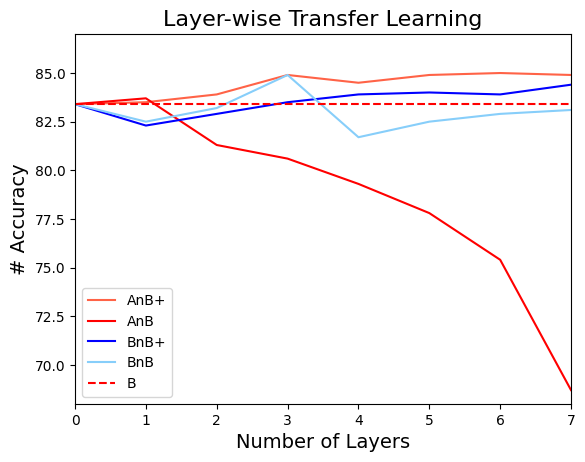

In [ ]:
import matplotlib.pyplot as plt

plt.xlim(0,7)

"""
-- TO-DO --
1. Plot the results
2. Save the plot
"""


plt.plot(a_b_, label='AnB+', color='tomato')
plt.plot(a_b, label='AnB', color='red')
plt.plot(b_b, label='BnB+', color='blue')
plt.plot(b_b_, label='BnB', color='lightskyblue')

plt.xlabel('Number of Layers', fontsize=14)
plt.ylabel('# Accuracy', fontsize=14)
plt.axhline(y=83.4, color='r', linestyle='--', label= 'B')
plt.legend()
plt.title('Layer-wise Transfer Learning', fontsize=16)
plt.ylim(68,87)